In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%%matplotlib inline
import seaborn as sns

UsageError: Line magic function `%%matplotlib` not found.


In [3]:
from sklearn.datasets import make_classification

In [25]:
from sklearn.model_selection import train_test_split
x, y = make_classification(n_samples = 2000, n_classes=2, weights = [1,1], random_state = 1) 

In [26]:
x.shape

(2000, 20)

In [27]:
y.shape

(2000,)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size=0.3)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
ytrain_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


RF train roc-auc: 1.0
RF test roc-auc: 0.9819555555555556


In [39]:
ytrain_pred.shape

(1400, 2)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
ytrain_pred = ada_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# Knn classifier


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [47]:
# Select the best thresholf

In [57]:
pred =[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1)
final_prediction

0         1         2    3
0    0.96  0.991861  0.559186  1.0
1    0.00  0.000008  0.463282  0.0
2    0.99  0.966929  0.538202  0.8
3    0.92  0.761539  0.509875  0.8
4    0.55  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.00  0.024239  0.461121  0.0
596  0.03  0.000003  0.441377  0.0
597  0.99  0.984385  0.532403  1.0
598  0.02  0.001147  0.441720  0.2
599  1.00  0.989540  0.559890  0.8

[600 rows x 4 columns]

In [58]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0      0.877762
1      0.115823
2      0.823783
3      0.747853
4      0.554947
         ...   
595    0.121340
596    0.117845
597    0.876697
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [59]:
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849333333333333


In [60]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.91123256, 0.91077475, 0.80993823,
       0.80912833, 0.79787052, 0.7955558 , 0.78140513, 0.78071156,
       0.76474465, 0.76287124, 0.72930851, 0.72887362, 0.71657482,
       0.71143711, 0.67101868, 0.65993537, 0.60279968, 0.59925354,
       0.59156376, 0.58614346, 0.57995356, 0.57800386, 0.56577749,
       0.56469563, 0.55494674, 0.54139283, 0.53855932, 0.48116892,
       0.45740225, 0.44794916, 0.4421034 , 0.38155357, 0.38129719,
       0.34636723, 0.34586612, 0.23904122, 0.23646893, 0.2319954 ,
       0.23140421, 0.20241423, 0.20098417, 0.12301207, 0.1228351 ,
       0.10748954])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

thresholds  accuracy
31    0.447949  0.960000
30    0.457402  0.960000
32    0.442103  0.958333
29    0.481169  0.958333
28    0.538559  0.958333
27    0.541393  0.958333
26    0.554947  0.956667
25    0.564696  0.955000
24    0.565777  0.953333
21    0.586143  0.948333
20    0.591564  0.946667
22    0.579954  0.946667
23    0.578004  0.946667
19    0.599254  0.945000
33    0.381554  0.945000
34    0.381297  0.943333
18    0.602800  0.943333
35    0.346367  0.938333
17    0.659935  0.936667
36    0.345866  0.936667
16    0.671019  0.935000
15    0.711437  0.920000
14    0.716575  0.918333
13    0.728874  0.901667
12    0.729309  0.900000
37    0.239041  0.880000
38    0.236469  0.878333
39    0.231995  0.876667
40    0.231404  0.875000
11    0.762871  0.861667
10    0.764745  0.860000
41    0.202414  0.845000
42    0.200984  0.843333
9     0.780712  0.840000
8     0.781405  0.838333
7     0.795556  0.815000
6     0.797871  0.813333
5     0.809128  0.801667
4     0.809938  0.800000
43    0.123012  0.671667
44    0.122835  0.670000
3     0.910775  0.505000
2     0.911233  0.503333
45    0.107490  0.501667
1     0.913441  0.500000
0     1.913441  0.500000

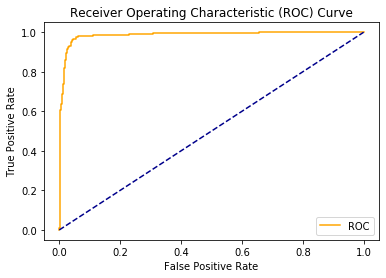

In [65]:
# def plot_roc_curve(fpr, tpr):
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()